In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib

In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
import math
import random
import itertools

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import balanced_accuracy_score
from imblearn.ensemble import BalancedRandomForestClassifier

ModuleNotFoundError: No module named 'xgboost'

In [5]:
!pip install xgboost

^C


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 1.3 MB/s eta 0:01:38
   ---------------------------------------- 0.1/124.9 MB 777.7 kB/s eta 0:02:41
   ---------------------------------------- 0.1/124.9 MB 726.2 kB/s eta 0:02:52
   ---------------------------------------- 0.1/124.9 MB 774.0 kB/s eta 0:02:42
   ---------------------------------------- 0.2/124.9 MB 827.9 kB/s eta 0:02:31
   ---------------------------------------- 0.3/124.9 MB 827.5 kB/s eta 0:02:31
   ---------------------------------------- 0.3/124.9 MB 827.5 kB/s eta 0:02:31
   ---------------------------------------- 0.3/124.9 MB 819.2 kB/s eta 0:02:33
   ---------------------------------------- 0.4/124.9 MB 825.0 kB/s eta 0:02:31
   ---------------------------------------- 0.4/124.9 MB 825.0 kB/s eta 0:02:31
   ---------------------------------------- 0.4/124.9 MB 825.0 kB/s eta 0:02:31
   ---------------------------------------- 0.4/124

DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.1.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_csv("train.csv")

In [6]:
joblib.dump(df, 'customer_churn_model.pkl')

['customer_churn_model.pkl']

EDA

In [34]:
df.isna().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

In [36]:
df.duplicated().sum()

0

In [40]:
df.nunique()

AccountAge                     119
MonthlyCharges              243787
TotalCharges                243787
SubscriptionType                 3
PaymentMethod                    4
PaperlessBilling                 2
ContentType                      3
MultiDeviceAccess                2
DeviceRegistered                 4
ViewingHoursPerWeek         243787
AverageViewingDuration      243787
ContentDownloadsPerMonth        50
GenrePreference                  5
UserRating                  243787
SupportTicketsPerMonth          10
Gender                           2
WatchlistSize                   25
ParentalControl                  2
SubtitlesEnabled                 2
CustomerID                  243787
Churn                            2
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [44]:
df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating', 'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl', 'SubtitlesEnabled', 'CustomerID', 'Churn'], dtype='object')

In [52]:
df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


In [16]:
df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')

In [20]:
df.head(20)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0
5,113,7.295744,824.419081,Premium,Mailed check,Yes,Both,No,Mobile,21.678290,...,35,Comedy,3.721134,8,Female,2,Yes,Yes,JY5HS0GWHW,0
6,38,12.340675,468.945639,Premium,Bank transfer,No,Both,No,Computer,36.512761,...,28,Action,4.090868,9,Female,20,No,Yes,79XSO6P5O3,0
7,25,7.247550,181.188753,Standard,Electronic check,Yes,TV Shows,No,TV,16.355816,...,10,Fantasy,3.410221,2,Female,22,No,No,2LDC9AQ3C5,0
8,26,19.803233,514.884050,Standard,Bank transfer,No,Movies,No,Tablet,8.202929,...,28,Fantasy,2.679986,0,Male,5,Yes,Yes,74DURHL3Y8,1
9,14,18.842934,263.801080,Standard,Bank transfer,No,Movies,No,Computer,38.560694,...,0,Comedy,2.993441,0,Male,18,No,No,CY8S2R3A1T,0


VISUALIZATIONS

In [99]:
# Grab Variables
def grab_variable(dataframe, num_th=10, car_th=20, var_name=False):

    # Categoric Variables #

    cat_var = [i for i in dataframe.columns if dataframe[i].dtypes in ["object", "category", "bool"]]

    num_but_cat = [i for i in dataframe.columns if dataframe[i].dtypes in ["int64", "float64"]
                   and dataframe[i].nunique() <= num_th]

    cat_but_car = [i for i in dataframe.columns if dataframe[i].dtypes in ["category", "object"]
                   and dataframe[i].nunique() > car_th]

    cat_var = cat_var + num_but_cat
    cat_var = [i for i in cat_var if i not in cat_but_car]

    # Numeric Variables #
    num_var = [i for i in dataframe.columns if dataframe[i].dtypes in ["int64", "float64"]
               and dataframe[i].nunique() > num_th]

    print("Observation:", len(dataframe))
    print("Number of Variables:", len(dataframe.columns))
    print("Number of Categoric Variables:", len(cat_var))
    print("Number of Num but Cat Variables:", len(num_but_cat))
    print("Number of Cat but Cardinal Variables:", len(cat_but_car))
    print("Number of Numeric Variables:", len(num_var))

    if var_name:
        print("Categoric Variables:", cat_var)
        print("Numeric But Categoric Variables:", num_but_cat)
        print("Categoric But Cardinal Variables:", cat_but_car)
        print("Numeric Variables:", num_var)
    return cat_var, cat_but_car, num_var

cat_var, cat_but_car, num_var = grab_variable(df)

Observation: 243787
Number of Variables: 26
Number of Categoric Variables: 17
Number of Num but Cat Variables: 5
Number of Cat but Cardinal Variables: 1
Number of Numeric Variables: 8


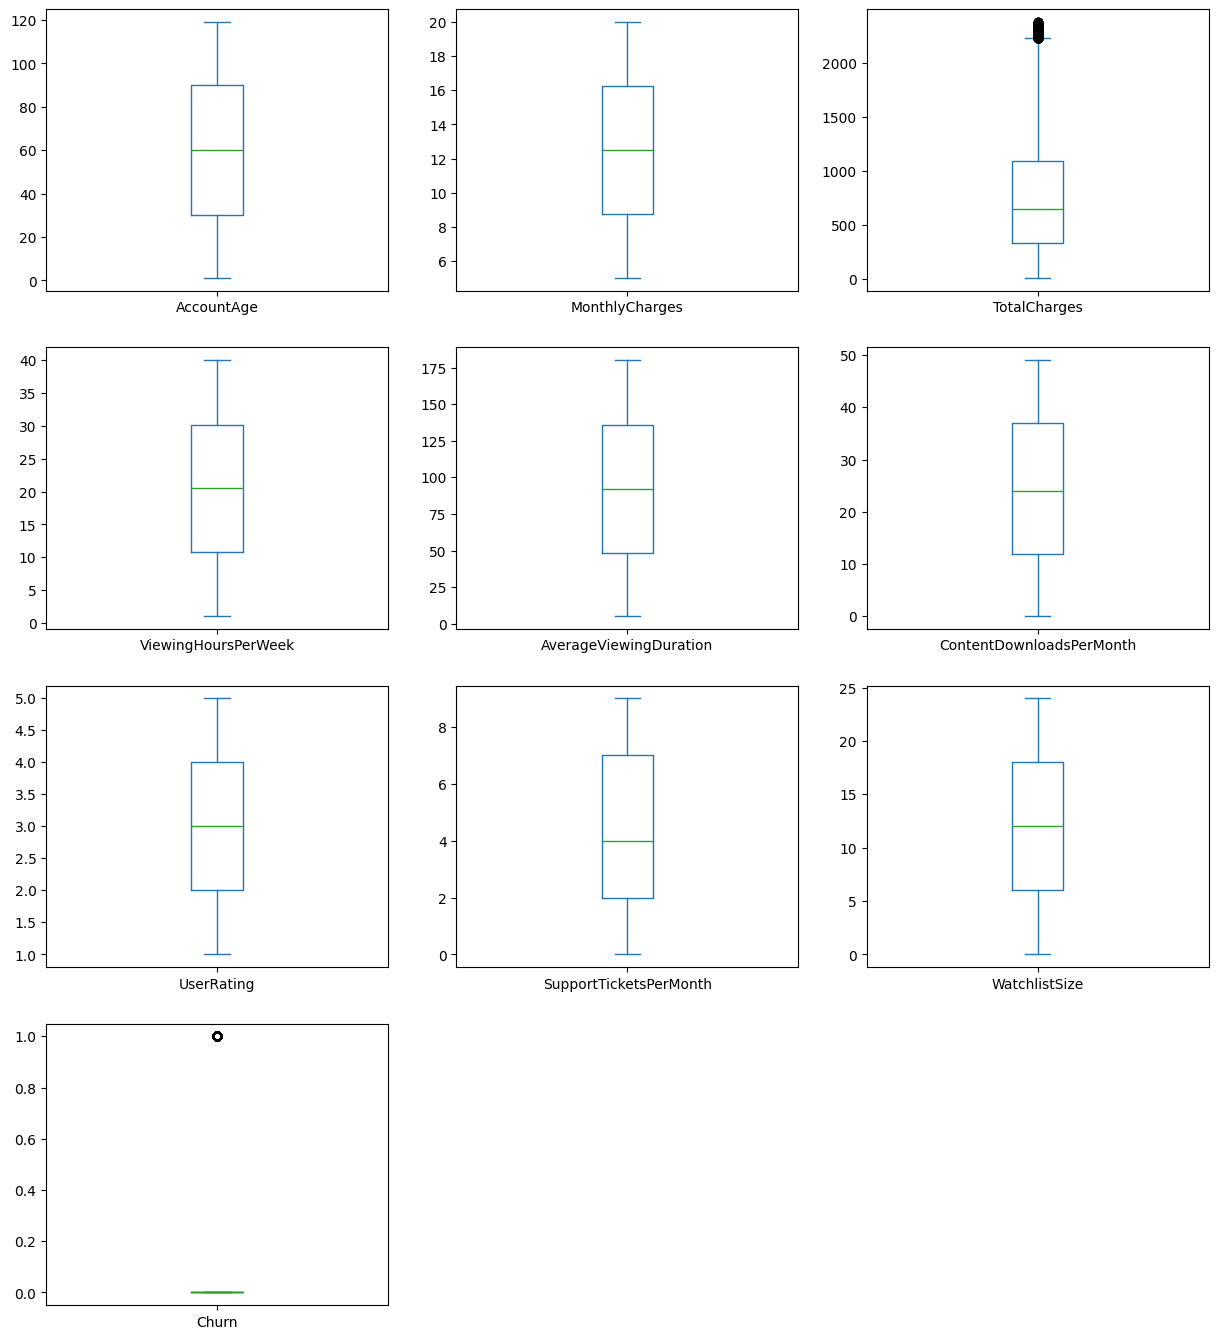

In [25]:
df.plot(kind="box", subplots=True, figsize=(15, 30), layout=(7, 3))\
plt.title("Boxplot")
plt.show()

In [73]:
def outlier_thresholds(df, variable, q1=0.25, q3=0.75):
    q1 = df[variable].quantile(q1)
    q3 = df[variable].quantile(q3)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

for i in num_var:
    print(i, ":", outlier_thresholds(df, i))

AccountAge : (-60.0, 180.0)
MonthlyCharges : (-2.5108822537315287, 27.487585566502734)
TotalCharges : (-811.1084761822483, 2229.5728643148022)
ViewingHoursPerWeek : (-18.419212297484723, 59.40256110709355)
AverageViewingDuration : (-82.90608528289064, 267.1965276075546)
ContentDownloadsPerMonth : (-25.5, 74.5)
UserRating : (-1.0011033867446884, 7.004113639054296)
WatchlistSize : (-12.0, 36.0)


In [75]:
def check_outlier(df, variable):
    lower_limit, upper_limit = outlier_thresholds(df, variable)
    if df[(df[variable] < lower_limit) | (df[variable] > upper_limit)].shape[0] > 0:
        print(variable, "-->", len(df[(df[variable] < lower_limit) | (df[variable] > upper_limit)]))
        return True
    else:
        return False

for i in num_var:
    print(i, ":", check_outlier(df, i))

AccountAge : False
MonthlyCharges : False
TotalCharges --> 741
TotalCharges : True
ViewingHoursPerWeek : False
AverageViewingDuration : False
ContentDownloadsPerMonth : False
UserRating : False
WatchlistSize : False


In [79]:
def suppress_outliers(df, variable):
    lower_limit, upper_limit = outlier_thresholds(df, variable)
    df.loc[df[variable] < lower_limit, variable] = lower_limit
    df.loc[df[variable] > upper_limit, variable] = upper_limit

for i in num_var:
    if check_outlier(df, i) == True:
        suppress_outliers(df, i)
        print("Suppressed Outliers for " + i)
    else:
        continue

TotalCharges --> 741
Suppressed Outliers for TotalCharges


In [81]:
for i in num_var:
    print(i, ":", check_outlier(df, i))

AccountAge : False
MonthlyCharges : False
TotalCharges : False
ViewingHoursPerWeek : False
AverageViewingDuration : False
ContentDownloadsPerMonth : False
UserRating : False
WatchlistSize : False


                          AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  AverageViewingDuration  ContentDownloadsPerMonth  UserRating  WatchlistSize
AccountAge                  1.000000        0.001706      0.820367            -0.001640                0.000191                  0.001220    0.000440      -0.002640
MonthlyCharges              0.001706        1.000000      0.498142            -0.003029               -0.000604                 -0.000127    0.000056      -0.000540
TotalCharges                0.820367        0.498142      1.000000            -0.003004                0.000848                  0.000205    0.000596      -0.001778
ViewingHoursPerWeek        -0.001640       -0.003029     -0.003004             1.000000                0.000949                  0.002149   -0.003185      -0.000750
AverageViewingDuration      0.000191       -0.000604      0.000848             0.000949                1.000000                 -0.002397   -0.000406       0.000749
ContentDow

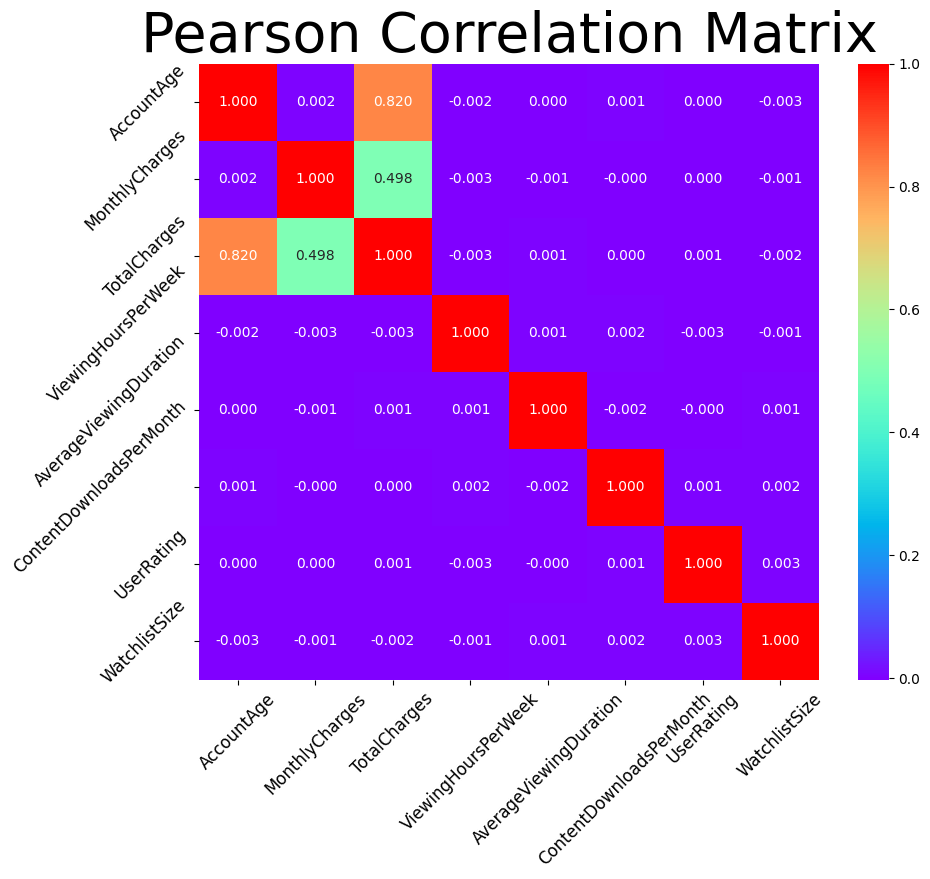

None


In [83]:
def pearson_corr(dataframe, num_cols, plot=False):

    print(df[num_cols].corr())

    if plot:
        plt.figure(figsize=[10, 8])
        sns.heatmap(data=dataframe[num_cols].corr(), annot=True, fmt=".3f",
                    linecolor="pink", cmap="rainbow")
        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(rotation=45, fontsize=12)
        plt.title("Pearson Correlation Matrix", fontsize=40)
        print(plt.show())

pearson_corr(df, num_var, plot=True)


FEATURE ENGINEERING

In [85]:
print(df["AccountAge"].describe().T)

labels = ["new_customer", "standard_customer", "old_customer"]

bins = [df["AccountAge"].min() - 1,
        24, 60,
        df["AccountAge"].max() + 1]

df["AccountAge_Segment"] = pd.cut(x=df["AccountAge"], bins=bins, labels=labels)

print(df.groupby("AccountAge_Segment").agg({"ViewingHoursPerWeek": "mean",
                                           "AverageViewingDuration": "mean",
                                           "ContentDownloadsPerMonth": ["mean", "count"]}))

count    243787.000000
mean         60.083758
std          34.285143
min           1.000000
25%          30.000000
50%          60.000000
75%          90.000000
max         119.000000
Name: AccountAge, dtype: float64
                   ViewingHoursPerWeek AverageViewingDuration ContentDownloadsPerMonth        
                                  mean                   mean                     mean   count
AccountAge_Segment                                                                            
new_customer                 20.507195              92.483013                24.548743   48786
standard_customer            20.532669              92.123164                24.480652   73856
old_customer                 20.481571              92.261785                24.499236  121145


                            ViewingHoursPerWeek AverageViewingDuration ContentDownloadsPerMonth       
                                           mean                   mean                     mean  count
ViewingHoursPerWeek_Segment                                                                           
less_watcher                           7.517136              92.112239                24.504159  81262
watcher                               20.511331              92.502499                24.460154  81262
hard_watcher                          33.477910              92.177447                24.546226  81263


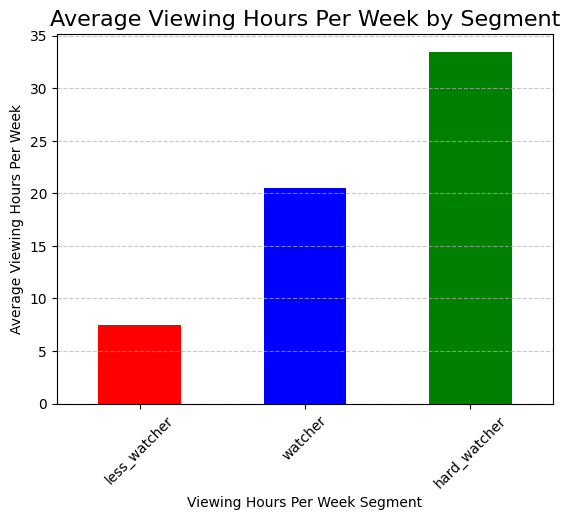

In [87]:
import nltk
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
df["ViewingHoursPerWeek_Segment"] = pd.qcut(df["ViewingHoursPerWeek"], q=3, labels=["less_watcher", "watcher", "hard_watcher"])
text_cols = df.select_dtypes(include=["object"]).columns.tolist()
if text_cols:
    vectorizer = CountVectorizer()
    bow_matrix = vectorizer.fit_transform(df[text_cols[0]])  
    bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    df = pd.concat([df, bow_df], axis=1)
agg_df = df.groupby("ViewingHoursPerWeek_Segment").agg({
    "ViewingHoursPerWeek": "mean",
    "AverageViewingDuration": "mean",
    "ContentDownloadsPerMonth": ["mean", "count"]
})
print(agg_df)
agg_df["ViewingHoursPerWeek"]["mean"].plot(kind="bar", color=["red", "blue", "green"])
plt.xlabel("Viewing Hours Per Week Segment")
plt.ylabel("Average Viewing Hours Per Week")
plt.title("Average Viewing Hours Per Week by Segment", fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [89]:
unique_tickets = df["SupportTicketsPerMonth"].nunique()
ticket_counts = df["SupportTicketsPerMonth"].value_counts()

print(f"Number of Unique --> {unique_tickets}")
print("Value Counts:\n", ticket_counts)
agg_result = df.groupby("SupportTicketsPerMonth").agg(
    MonthlyCharges_mean=("MonthlyCharges", "mean"),
    ViewingHoursPerWeek_mean=("ViewingHoursPerWeek", "mean"),
    Churn_mean=("Churn", "mean"),
    Churn_count=("Churn", "count"),
)
print(agg_result)
df["New_SupportTicketsPerMonth"] = df["SupportTicketsPerMonth"].apply(
    lambda x: 0 if 0 <= x < 6 else 1
)
df.head()

Number of Unique --> 10
Value Counts:
 SupportTicketsPerMonth
7    24626
4    24618
2    24477
9    24435
8    24400
3    24360
6    24296
0    24292
1    24283
5    24000
Name: count, dtype: int64
                        MonthlyCharges_mean  ViewingHoursPerWeek_mean  Churn_mean  Churn_count
SupportTicketsPerMonth                                                                        
0                                 12.470947                 20.632531    0.133583        24292
1                                 12.452410                 20.433606    0.145081        24283
2                                 12.490431                 20.421323    0.152020        24477
3                                 12.509898                 20.369845    0.161289        24360
4                                 12.535406                 20.630899    0.174547        24618
5                                 12.510057                 20.388707    0.182750        24000
6                                 12.53072

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn,AccountAge_Segment,ViewingHoursPerWeek_Segment,basic,premium,standard,New_SupportTicketsPerMonth
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0,new_customer,hard_watcher,0,1,0,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0,standard_customer,hard_watcher,1,0,0,1
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0,old_customer,less_watcher,1,0,0,1
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0,standard_customer,hard_watcher,1,0,0,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0,standard_customer,watcher,0,1,0,0


In [91]:
df.drop("SupportTicketsPerMonth", axis=1, inplace=True)

In [107]:
from sklearn.preprocessing import OneHotEncoder
cat_var, cat_but_car, num_var = grab_variable(df)
cat_var.remove("Churn")
encoder = OneHotEncoder(drop='first', dtype=int, sparse_output=False)
encoded_features = encoder.fit_transform(df[cat_var])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(cat_var))
df = df.drop(columns=cat_var).reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)

Observation: 243787
Number of Variables: 37
Number of Categoric Variables: 28
Number of Num but Cat Variables: 28
Number of Cat but Cardinal Variables: 1
Number of Numeric Variables: 8


In [109]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def standardize_data(dataframe, variable, method="standard"):
    scalers = {
        "standard": StandardScaler(),
        "minmax": MinMaxScaler(),
        "robust": RobustScaler(),
    }

    if method in scalers:
        scaler = scalers[method]
        dataframe[variable] = scaler.fit_transform(dataframe[variable])
    else:
        raise ValueError("Invalid method. Choose from 'standard', 'minmax', or 'robust'.")


standardize_data(df, num_var, method="standard")  


In [42]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_columns:
    encoder_name = f"{col}_encoder"
    print(f"\n{encoder_name} = LabelEncoder()")
    print(f"train_data['{col}'] = {encoder_name}.fit_transform(train_data['{col}'])")



SubscriptionType_encoder = LabelEncoder()
train_data['SubscriptionType'] = SubscriptionType_encoder.fit_transform(train_data['SubscriptionType'])

PaymentMethod_encoder = LabelEncoder()
train_data['PaymentMethod'] = PaymentMethod_encoder.fit_transform(train_data['PaymentMethod'])

PaperlessBilling_encoder = LabelEncoder()
train_data['PaperlessBilling'] = PaperlessBilling_encoder.fit_transform(train_data['PaperlessBilling'])

ContentType_encoder = LabelEncoder()
train_data['ContentType'] = ContentType_encoder.fit_transform(train_data['ContentType'])

MultiDeviceAccess_encoder = LabelEncoder()
train_data['MultiDeviceAccess'] = MultiDeviceAccess_encoder.fit_transform(train_data['MultiDeviceAccess'])

DeviceRegistered_encoder = LabelEncoder()
train_data['DeviceRegistered'] = DeviceRegistered_encoder.fit_transform(train_data['DeviceRegistered'])

GenrePreference_encoder = LabelEncoder()
train_data['GenrePreference'] = GenrePreference_encoder.fit_transform(train_data['GenrePreference'])

Ge

In [44]:
#Encoding on Training data
SubscriptionType_encoder=LabelEncoder()
df['SubscriptionType']=SubscriptionType_encoder.fit_transform(df['SubscriptionType'])

PaymentMethod_encoder=LabelEncoder()
df['PaymentMethod']=PaymentMethod_encoder.fit_transform(df['PaymentMethod'])

PaperlessBilling_encoder=LabelEncoder()
df['PaperlessBilling']=PaperlessBilling_encoder.fit_transform(df['PaperlessBilling'])

ContentType_encoder=LabelEncoder()
df['ContentType']=ContentType_encoder.fit_transform(df['ContentType'])

MultiDeviceAccess_encoder=LabelEncoder()
df['MultiDeviceAccess']=MultiDeviceAccess_encoder.fit_transform(df['MultiDeviceAccess'])

DeviceRegistered_encoder=LabelEncoder()
df['DeviceRegistered']=DeviceRegistered_encoder.fit_transform(df['DeviceRegistered'])

GenrePreference_encoder=LabelEncoder()
df['GenrePreference']=GenrePreference_encoder.fit_transform(df['GenrePreference'])

Gender_encoder=LabelEncoder()
df['Gender']=Gender_encoder.fit_transform(df['Gender'])

ParentalControl_encoder=LabelEncoder()
df['ParentalControl']=ParentalControl_encoder.fit_transform(df['ParentalControl'])

SubtitlesEnabled_encoder=LabelEncoder()
df['SubtitlesEnabled']=SubtitlesEnabled_encoder.fit_transform(df['SubtitlesEnabled'])

In [46]:
df[categorical_columns].sample(5)

,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,GenrePreference,Gender,ParentalControl,SubtitlesEnabled
59489,1,0,0,2,1,1,1,1,1,1
3387,1,2,0,1,0,2,4,0,1,1
66677,0,1,1,2,1,3,0,1,0,1
142968,2,1,1,1,0,1,3,1,0,1
82231,2,0,1,2,0,2,3,1,0,1


In [48]:
#Encoding Categorical Columns of Testing Data
for col in categorical_columns:
    print()
    print(f"#{col}")
    print(f"df1['{col}']={col}_encoder.transform(df['{col}'])")


#SubscriptionType
df1['SubscriptionType']=SubscriptionType_encoder.transform(df['SubscriptionType'])

#PaymentMethod
df1['PaymentMethod']=PaymentMethod_encoder.transform(df['PaymentMethod'])

#PaperlessBilling
df1['PaperlessBilling']=PaperlessBilling_encoder.transform(df['PaperlessBilling'])

#ContentType
df1['ContentType']=ContentType_encoder.transform(df['ContentType'])

#MultiDeviceAccess
df1['MultiDeviceAccess']=MultiDeviceAccess_encoder.transform(df['MultiDeviceAccess'])

#DeviceRegistered
df1['DeviceRegistered']=DeviceRegistered_encoder.transform(df['DeviceRegistered'])

#GenrePreference
df1['GenrePreference']=GenrePreference_encoder.transform(df['GenrePreference'])

#Gender
df1['Gender']=Gender_encoder.transform(df['Gender'])

#ParentalControl
df1['ParentalControl']=ParentalControl_encoder.transform(df['ParentalControl'])

#SubtitlesEnabled
df1['SubtitlesEnabled']=SubtitlesEnabled_encoder.transform(df['SubtitlesEnabled'])


In [50]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
categorical_columns = [
    'SubscriptionType', 'PaymentMethod', 'PaperlessBilling',
    'ContentType', 'MultiDeviceAccess', 'DeviceRegistered',
    'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled']
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

df[categorical_columns] = encoder.fit_transform(df[categorical_columns])

df1[categorical_columns] = encoder.transform(df1[categorical_columns])

print("Transformed training data sample:")
print(df[categorical_columns].head())

print("\nTransformed test data sample:")
print(df1[categorical_columns].head())


Transformed training data sample:
   SubscriptionType  PaymentMethod  PaperlessBilling  ContentType  \
0               1.0            3.0               0.0          0.0   
1               0.0            1.0               1.0          1.0   
2               0.0            3.0               1.0          1.0   
3               0.0            2.0               0.0          2.0   
4               1.0            2.0               1.0          2.0   

   MultiDeviceAccess  DeviceRegistered  GenrePreference  Gender  \
0                0.0               1.0              4.0     1.0   
1                0.0               3.0              0.0     1.0   
2                0.0               0.0              3.0     1.0   
3                0.0               3.0              2.0     1.0   
4                0.0               2.0              1.0     0.0   

   ParentalControl  SubtitlesEnabled  
0              0.0               0.0  
1              0.0               1.0  
2              1.0             

In [52]:
import numpy as np
from sklearn.preprocessing import StandardScaler

for col in numerical_columns:
    scaler_name = f"{col}_scaler"
    print()
    print(f"#{col}")
    print(f"{scaler_name} = StandardScaler()")
    print(f"train_data['{col}'] = {scaler_name}.fit_transform(np.array(train_data['{col}']).reshape(-1, 1))")



#AccountAge
AccountAge_scaler = StandardScaler()
train_data['AccountAge'] = AccountAge_scaler.fit_transform(np.array(train_data['AccountAge']).reshape(-1, 1))

#ContentDownloadsPerMonth
ContentDownloadsPerMonth_scaler = StandardScaler()
train_data['ContentDownloadsPerMonth'] = ContentDownloadsPerMonth_scaler.fit_transform(np.array(train_data['ContentDownloadsPerMonth']).reshape(-1, 1))

#SupportTicketsPerMonth
SupportTicketsPerMonth_scaler = StandardScaler()
train_data['SupportTicketsPerMonth'] = SupportTicketsPerMonth_scaler.fit_transform(np.array(train_data['SupportTicketsPerMonth']).reshape(-1, 1))

#WatchlistSize
WatchlistSize_scaler = StandardScaler()
train_data['WatchlistSize'] = WatchlistSize_scaler.fit_transform(np.array(train_data['WatchlistSize']).reshape(-1, 1))


In [54]:
df[numerical_columns].sample(3)

,AccountAge,ContentDownloadsPerMonth,SupportTicketsPerMonth,WatchlistSize
69584,62,48,4,22
91838,12,21,0,17
81022,55,30,0,9


In [56]:
#AccountAge
AccountAge_scaler=StandardScaler()
df['AccountAge']=AccountAge_scaler.fit_transform(np.array(df['AccountAge']).reshape(len(df['AccountAge']),1))

#MonthlyCharges
MonthlyCharges_scaler=StandardScaler()
df['MonthlyCharges']=MonthlyCharges_scaler.fit_transform(np.array(df['MonthlyCharges']).reshape(len(df['MonthlyCharges']),1))

#TotalCharges
TotalCharges_scaler=StandardScaler()
df['TotalCharges']=TotalCharges_scaler.fit_transform(np.array(df['TotalCharges']).reshape(len(df['TotalCharges']),1))

#ViewingHoursPerWeek
ViewingHoursPerWeek_scaler=StandardScaler()
df['ViewingHoursPerWeek']=ViewingHoursPerWeek_scaler.fit_transform(np.array(df['ViewingHoursPerWeek']).reshape(len(df['ViewingHoursPerWeek']),1))

#AverageViewingDuration
AverageViewingDuration_scaler=StandardScaler()
df['AverageViewingDuration']=AverageViewingDuration_scaler.fit_transform(np.array(df['AverageViewingDuration']).reshape(len(df['AverageViewingDuration']),1))

#ContentDownloadsPerMonth
ContentDownloadsPerMonth_scaler=StandardScaler()
df['ContentDownloadsPerMonth']=ContentDownloadsPerMonth_scaler.fit_transform(np.array(df['ContentDownloadsPerMonth']).reshape(len(df['ContentDownloadsPerMonth']),1))

#UserRating
UserRating_scaler=StandardScaler()
df['UserRating']=UserRating_scaler.fit_transform(np.array(df['UserRating']).reshape(len(df['UserRating']),1))

#SupportTicketsPerMonth
SupportTicketsPerMonth_scaler=StandardScaler()
df['SupportTicketsPerMonth']=SupportTicketsPerMonth_scaler.fit_transform(np.array(df['SupportTicketsPerMonth']).reshape(len(df['SupportTicketsPerMonth']),1))

#WatchlistSize
WatchlistSize_scaler=StandardScaler()
df['WatchlistSize']=WatchlistSize_scaler.fit_transform(np.array(df['WatchlistSize']).reshape(len(df['WatchlistSize']),1))

In [58]:
df[numerical_columns].sample(3)

,AccountAge,ContentDownloadsPerMonth,SupportTicketsPerMonth,WatchlistSize
59517,-0.352450,0.311798,1.216976,-1.114762
226062,1.426750,-0.589656,-1.568014,0.414498
111791,-0.498286,0.866539,-1.568014,-0.141597


In [60]:
df1[numerical_columns].sample(3)

,AccountAge,ContentDownloadsPerMonth,SupportTicketsPerMonth,WatchlistSize
76196,17,44,1,1
21516,2,29,2,13
28728,99,11,1,4


In [62]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler
for col in numerical_columns:
    print()
    print(f"#{col}")
    print(f"test_data['{col}']={col}_scaler.transform(np.array(test_data['{col}']).reshape(len(test_data['{col}']),1))")


#AccountAge
test_data['AccountAge']=AccountAge_scaler.transform(np.array(test_data['AccountAge']).reshape(len(test_data['AccountAge']),1))

#ContentDownloadsPerMonth
test_data['ContentDownloadsPerMonth']=ContentDownloadsPerMonth_scaler.transform(np.array(test_data['ContentDownloadsPerMonth']).reshape(len(test_data['ContentDownloadsPerMonth']),1))

#SupportTicketsPerMonth
test_data['SupportTicketsPerMonth']=SupportTicketsPerMonth_scaler.transform(np.array(test_data['SupportTicketsPerMonth']).reshape(len(test_data['SupportTicketsPerMonth']),1))

#WatchlistSize
test_data['WatchlistSize']=WatchlistSize_scaler.transform(np.array(test_data['WatchlistSize']).reshape(len(test_data['WatchlistSize']),1))


ML Model


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [114]:
num_features = df.select_dtypes(include=["number"]).columns
cat_features = df.select_dtypes(include=["object"]).columns

imputer = SimpleImputer(strategy="median") 
df[num_features] = imputer.fit_transform(df[num_features])
if len(cat_features) > 0:
    encoders = {col: LabelEncoder() for col in cat_features}
    for col, encoder in encoders.items():
        df[col] = encoder.fit_transform(df[col])

X = df.drop(columns=["Churn"], errors="ignore") 
y = df["Churn"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, stratify=y, random_state=42
)

models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=4),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

f1_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"\n Model: {name}")
    print(f"   Accuracy  : {acc:.4f}")
    print(f"   Precision : {precision:.4f}")
    print(f"   Recall    : {recall:.4f}")
    print(f"   F1 Score  : {f1:.4f}")
    print(f"   ROC AUC   : {roc_auc:.4f}")

    f1_scores.append((f1, name))

# Print sorted F1 scores
f1_scores.sort(reverse=True)
print("\nSorted F1 Scores:", f1_scores)


 Model: Naive Bayes
   Accuracy  : 0.7947
   Precision : 0.4158
   Recall    : 0.3274
   F1 Score  : 0.3664
   ROC AUC   : 0.6128

 Model: Logistic Regression
   Accuracy  : 0.8242
   Precision : 0.5760
   Recall    : 0.1145
   F1 Score  : 0.1911
   ROC AUC   : 0.5479

 Model: Decision Tree
   Accuracy  : 0.8188
   Precision : 0.0000
   Recall    : 0.0000
   F1 Score  : 0.0000
   ROC AUC   : 0.5000

 Model: KNN
   Accuracy  : 0.7983
   Precision : 0.3522
   Recall    : 0.1349
   F1 Score  : 0.1951
   ROC AUC   : 0.5400

Sorted F1 Scores: [(0.36637123322360093, 'Naive Bayes'), (0.19507724535218643, 'KNN'), (0.19105875245431203, 'Logistic Regression'), (0.0, 'Decision Tree')]


SMOTE: DECISION TREE

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
X = df.drop('Churn', axis=1)
y = df['Churn']
original_churn_count = (y == 1).sum()
original_not_churn_count = (y == 0).sum()
original_total_count = len(y)
original_percentage_churn = (original_churn_count / original_total_count) * 100
original_percentage_not_churn = (original_not_churn_count / original_total_count) * 100

print("*** Before SMOTE ***")
print("Percentage of 'Churn':", original_percentage_churn)
print("Percentage of 'Not Churn':", original_percentage_not_churn)
smote = SMOTE(sampling_strategy=0.25, random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X, y)

churn_count = (y_resampled == 1).sum()
not_churn_count = (y_resampled == 0).sum()

total_count = len(y_resampled)
percentage_churn = (churn_count / total_count) * 100
percentage_not_churn = (not_churn_count / total_count) * 100

print("\n*** After SMOTE ***")
print("Percentage of 'Churn':", percentage_churn)
print("Percentage of 'Not Churn':", percentage_not_churn)

*** Before SMOTE ***
Percentage of 'Churn': 18.123197709475892
Percentage of 'Not Churn': 81.87680229052411

*** After SMOTE ***
Percentage of 'Churn': 19.999919841607017
Percentage of 'Not Churn': 80.00008015839299


In [119]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
y_train_resampled_series = pd.Series(y_train_resampled, name='Churn')
resampled_data = pd.concat([pd.DataFrame(X_train_resampled), y_train_resampled_series], axis=1)
X_resampled = resampled_data.drop('Churn', axis=1)
y_resampled = resampled_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [267]:
churn_count = resampled_data['Churn'].sum()
not_churn_count = len(resampled_data) - churn_count
total_count = len(resampled_data)
percentage_churn = (churn_count / total_count) * 100
percentage_not_churn = (not_churn_count / total_count) * 100
print("*** After sampling ***")
print(f"Percentage of 'Churn': {percentage_churn:.2f}%")
print(f"Percentage of 'Not Churn': {percentage_not_churn:.2f}%")
labels = ['Churn', 'Not Churn']
sizes = [percentage_churn, percentage_not_churn]

*** After sampling ***
Percentage of 'Churn': 50.00%
Percentage of 'Not Churn': 50.00%


Hyperparameter Optimization with RandomizedSearchCV

In [142]:
params = {"max_depth": range(2, 15),
          "n_estimators": range(10, 50),
          "min_samples_split": [2, 3, 4],
          "max_features": ["sqrt", "log", None,  "auto"],
          "criterion": ["gini", "entropy"]}

In [144]:
rf_random = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=20, cv=3, random_state=42, n_jobs=-1)

In [146]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 15),
                                        'max_features': ['sqrt', 'log', None,
                                                         'auto'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': range(10, 50)},
                   random_state=42)

In [160]:
print("Best Params-->", rf_random.best_params_)
print("Best Score-->", rf_random.best_score_)

Best Params--> {'n_estimators': 28, 'min_samples_split': 3, 'max_features': None, 'max_depth': 13, 'criterion': 'gini'}
Best Score--> 0.7955120326332853


In [156]:
model_tuned = model.set_params(**rf_random.best_params_).fit(X_train, y_train)

In [162]:
y_pred = model_tuned.predict(X_test)
print(classification_report(y_test, y_pred))


y_prob = model_tuned.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc_auc}")

              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80     37392
         1.0       0.78      0.88      0.83     37460

    accuracy                           0.81     74852
   macro avg       0.82      0.81      0.81     74852
weighted avg       0.82      0.81      0.81     74852

ROC AUC: 0.8905076176248247


In [167]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [15, 17],
    "n_estimators": [40, 50, 70]
}

rf_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=2,
    scoring="f1",
    n_jobs=-1,
    verbose=2
)

rf_search.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END ......................max_depth=15, n_estimators=40; total time=  53.5s
[CV] END ......................max_depth=15, n_estimators=40; total time=  54.4s
[CV] END ......................max_depth=17, n_estimators=40; total time=  57.7s
[CV] END ......................max_depth=17, n_estimators=40; total time=  57.9s
[CV] END ......................max_depth=15, n_estimators=50; total time= 1.1min
[CV] END ......................max_depth=15, n_estimators=50; total time= 1.1min
[CV] END ......................max_depth=15, n_estimators=70; total time= 1.6min
[CV] END ......................max_depth=15, n_estimators=70; total time= 1.6min
[CV] END ......................max_depth=17, n_estimators=50; total time= 1.1min
[CV] END ......................max_depth=17, n_estimators=50; total time= 1.1min
[CV] END ......................max_depth=17, n_estimators=70; total time= 1.3min
[CV] END ......................max_depth=17, n_es

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_depth=13, max_features=None,
                                              min_samples_split=3,
                                              n_estimators=28,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [15, 17], 'n_estimators': [40, 50, 70]},
             scoring='f1', verbose=2)

In [173]:
print("Best Parameters:", rf_search.best_params_)
print("Best F1 Score:", rf_search.best_score_)


Best Parameters: {'max_depth': 17, 'n_estimators': 70}
Best F1 Score: 0.8520966723696461


In [177]:
model_tuned = model_tuned.set_params(**rf_search.best_params_).fit(X_train, y_train)

In [179]:
from sklearn.metrics import classification_report, roc_auc_score


y_pred = model_tuned.predict(X_test)
y_prob = model_tuned.predict_proba(X_test)[:, 1]


print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_prob)}")

              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90     37392
         1.0       0.86      0.97      0.91     37460

    accuracy                           0.91     74852
   macro avg       0.91      0.91      0.91     74852
weighted avg       0.91      0.91      0.91     74852

ROC AUC: 0.9789906844865017


In [181]:
train_predictions = model_tuned.predict(X_train)
print(classification_report(y_train, train_predictions))

train_probabilities = model_tuned.predict_proba(X_train)[:, 1]
print(f"roc_auc --> {roc_auc_score(y_train, train_probabilities)}")

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    112312
         1.0       0.96      1.00      0.98    112244

    accuracy                           0.98    224556
   macro avg       0.98      0.98      0.98    224556
weighted avg       0.98      0.98      0.98    224556

roc_auc --> 0.9993045450664235


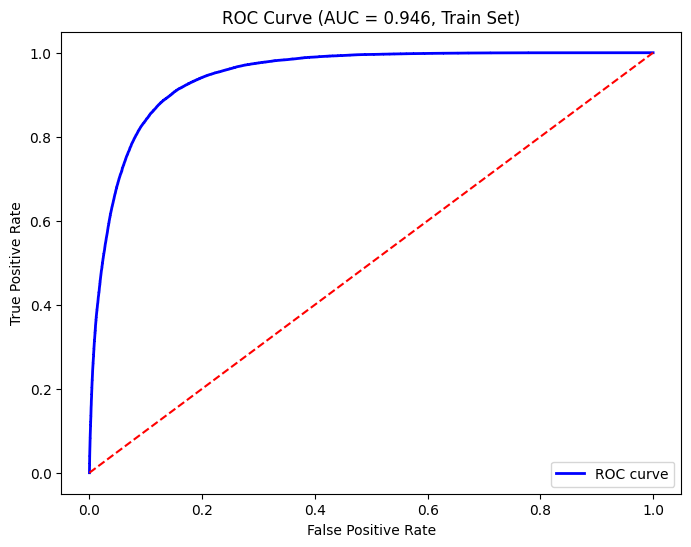

In [189]:
# Train Set K-Fold Cross Validation
cv_results = cross_validate(model_tuned,
                            X_train, y_train,
                            cv=5,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

print("Accuracy:", round(cv_results["test_accuracy"].mean(), 2))
print("Precision:", round(cv_results["test_precision"].mean(), 2))
print("Recall:", round(cv_results["test_recall"].mean(), 2))
print("f1:", round(cv_results["test_f1"].mean(), 2))
print("roc_auc:", round(cv_results["test_roc_auc"].mean(), 2))

Accuracy: 0.89
Precision: 0.84
Recall: 0.96
f1: 0.9
roc_auc: 0.97


FEATURE IMPORTANCE

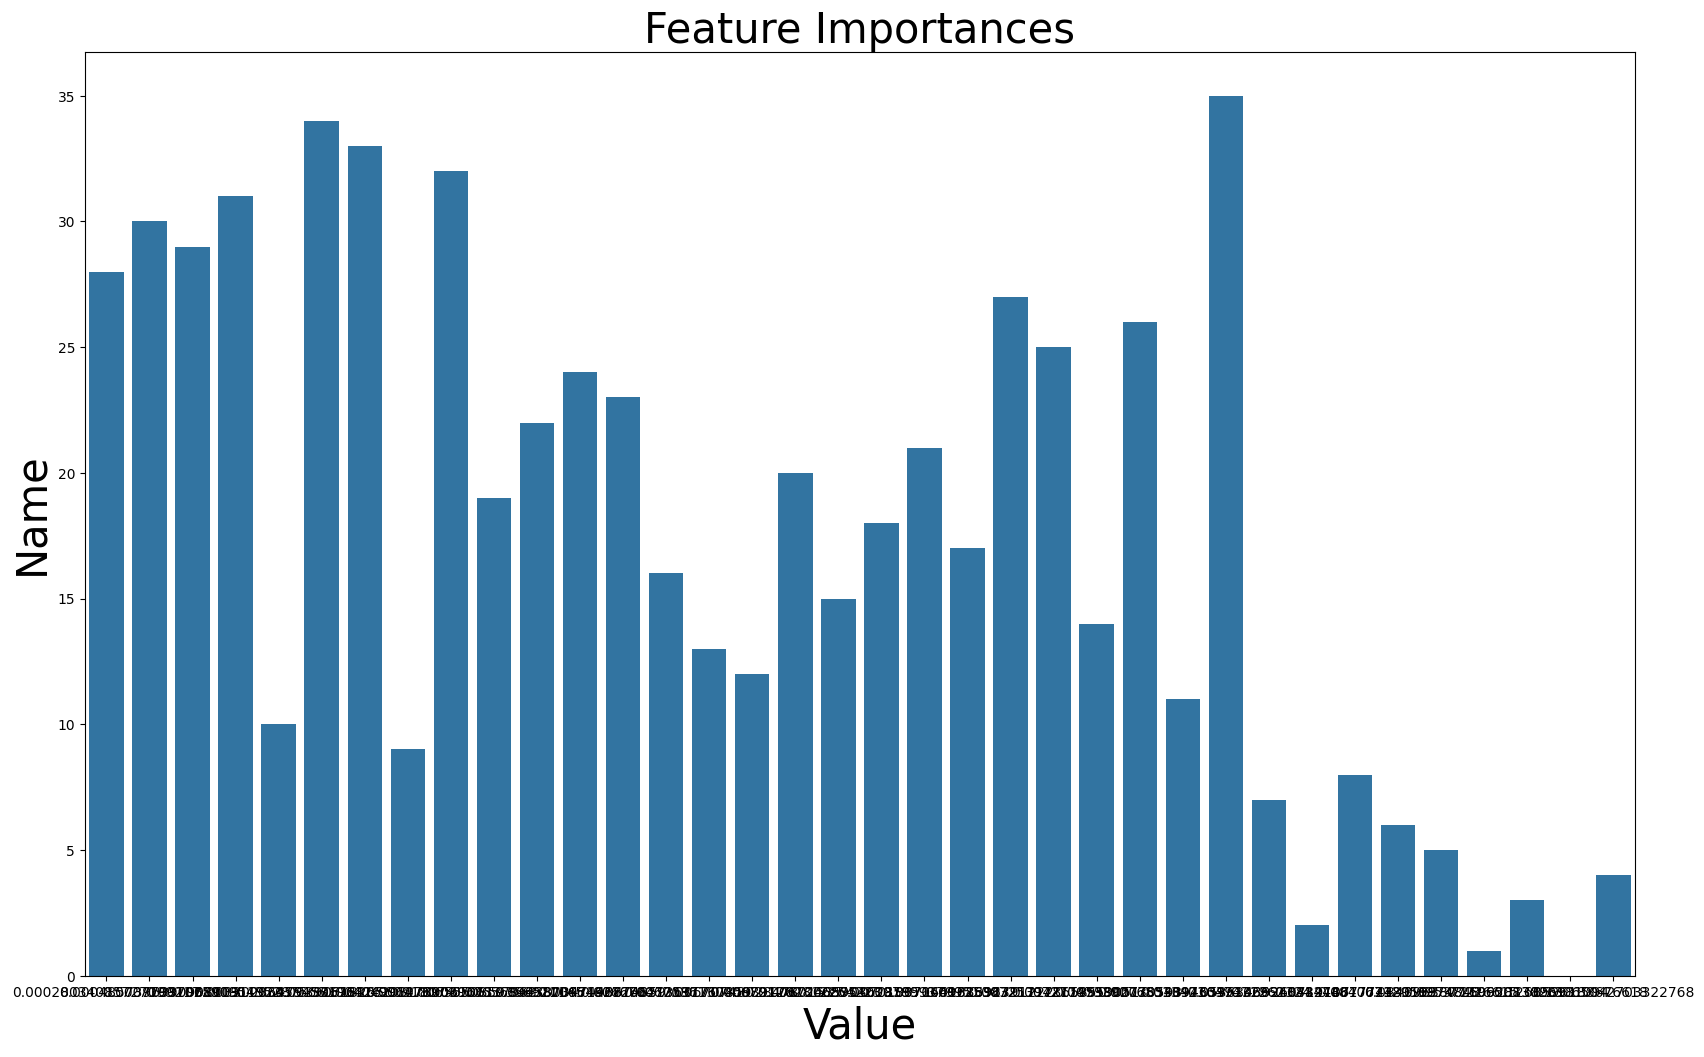

In [192]:
def plot_feature_improtances(model, feature, num=len(X)):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_,
                                "Name": feature.columns})
    plt.figure(figsize=(20, 12))
    sns.barplot(x="Value", y="Name", data=feature_imp.sort_values("Value", ascending=False)[0: num])
    plt.title("Feature Importances", fontsize=30)
    plt.xlabel("Value", fontsize=30)
    plt.ylabel("Name", fontsize=30)
    plt.show()

plot_feature_improtances(model_tuned, X_test)

Hyperparameter Optimization w RandomizedSearchCV

In [205]:
params = {"criterion": ["gini", "entropy"],
          "max_depth": range(2, 30),
          "splitter": ["best", "random"],
          "min_samples_split": range(2, 10),
          "min_samples_leaf": range(1, 5),
          "max_features": ["auto", "sqrt", "log2", 3, 5, 7]}

cart_random = RandomizedSearchCV(estimator=cart_model,
                               param_distributions=params,
                               cv=3,
                               random_state=42,
                               n_iter=100, n_jobs=-1)
cart_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 3},
                                                    random_state=45),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 30),
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         3, 5, 7],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(2, 10),
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [207]:
print("Best Parameters-->", cart_random.best_params_)
print("Best Score-->", cart_random.best_score_)

Best Parameters--> {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 24, 'criterion': 'entropy'}
Best Score--> 0.7973443027756013


TUNED MODEL

In [210]:
cart_tuned_model = cart_model.set_params(**cart_random.best_params_).fit(X_train, y_train)

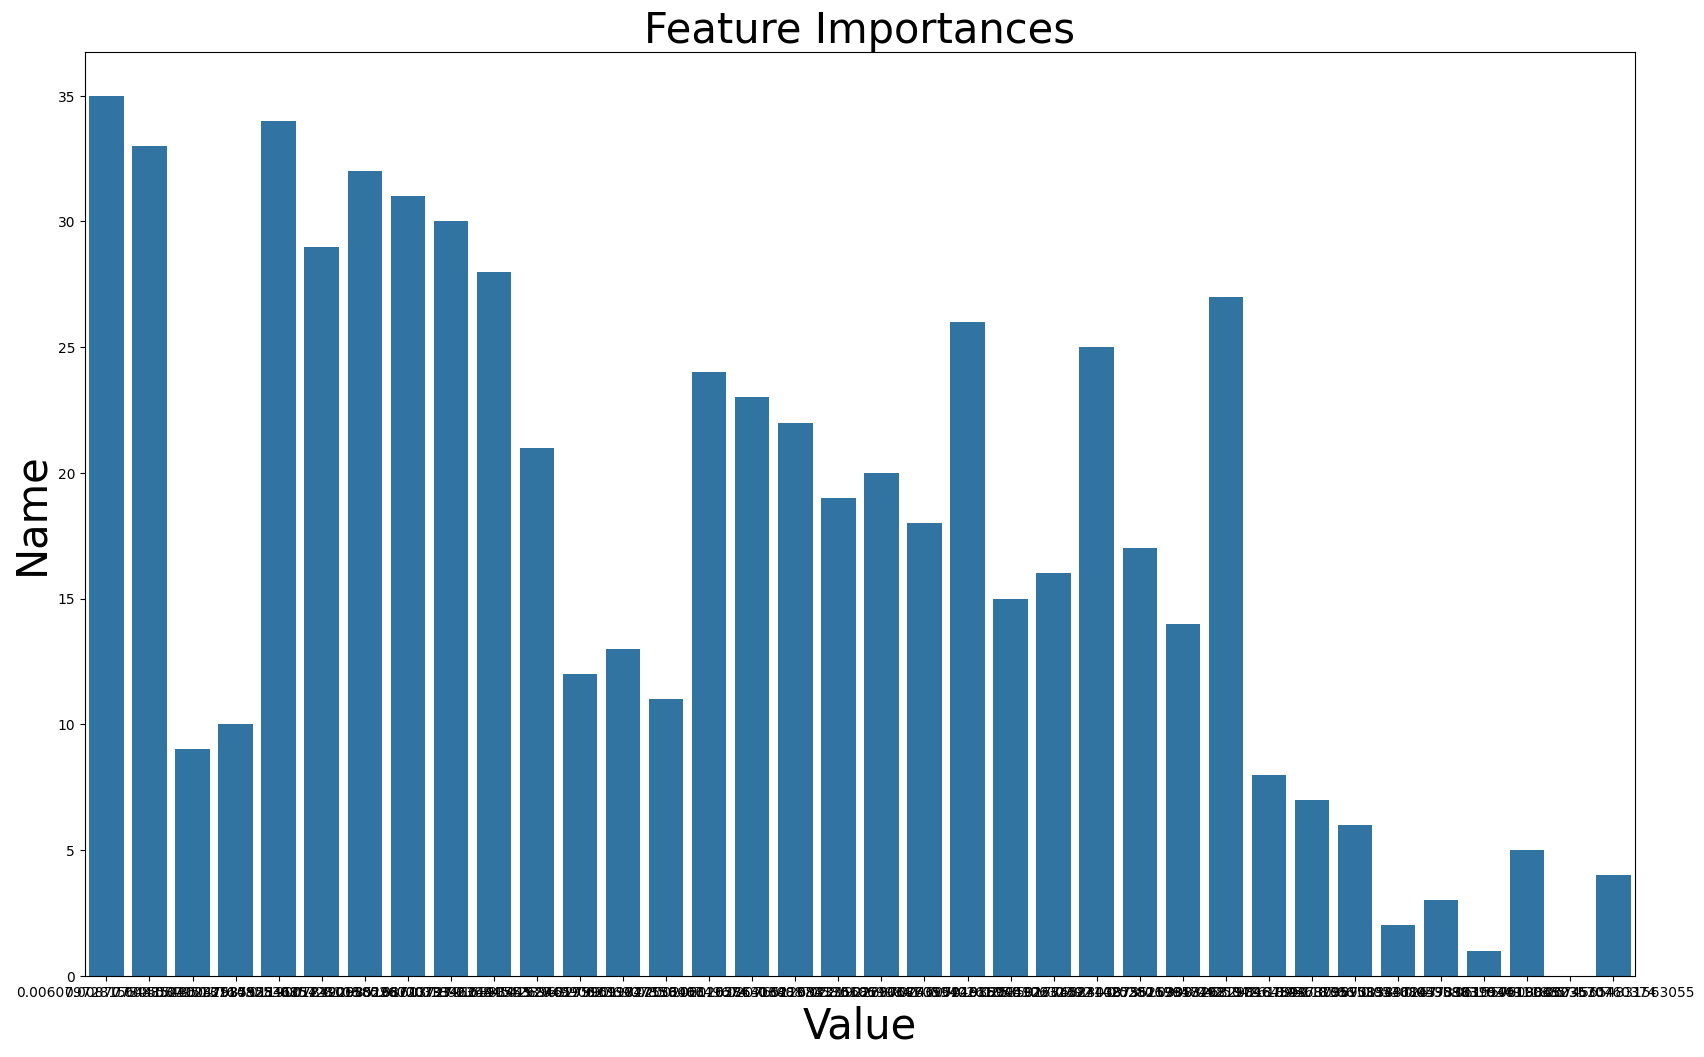

In [216]:
plot_feature_improtances(cart_tuned_model, X_test)

SMOTE LightGBM Model After Feature Selection

In [224]:
df2 = df_.copy()
df2.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [226]:
df2.drop(["PaymentMethod", "PaperlessBilling", "GenrePreference", "Gender", "ContentType",
          "SupportTicketsPerMonth", "ParentalControl", "DeviceRegistered", "CustomerID"], axis=1, inplace=True)
df2.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,WatchlistSize,SubtitlesEnabled,Churn
0,20,11.055215,221.104302,Premium,No,36.758104,63.531377,10,2.176498,3,No,0
1,57,5.175208,294.986882,Basic,No,32.450568,25.725595,18,3.478632,23,Yes,0
2,73,12.106657,883.785952,Basic,No,7.395160,57.364061,23,4.238824,1,Yes,0
3,32,7.263743,232.439774,Basic,No,27.960389,131.537507,30,4.276013,24,Yes,0
4,57,16.953078,966.325422,Premium,No,20.083397,45.356653,20,3.616170,0,No,0


In [228]:
cat_var, cat_but_car, num_var = grab_variable(df2)

Observation: 243787
Number of Variables: 12
Number of Categoric Variables: 4
Number of Num but Cat Variables: 1
Number of Cat but Cardinal Variables: 0
Number of Numeric Variables: 8


In [230]:
cat_var.remove("Churn")
df2 = pd.get_dummies(data=df2, columns=cat_var, dtype="int64", drop_first=True)
df2.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,WatchlistSize,Churn,SubscriptionType_Premium,SubscriptionType_Standard,MultiDeviceAccess_Yes,SubtitlesEnabled_Yes
0,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,3,0,1,0,0,0
1,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,23,0,0,0,0,1
2,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,1,0,0,0,0,1
3,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,24,0,0,0,0,1
4,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,0,0,1,0,0,0


In [234]:
scaler = StandardScaler()
df2[num_var] = scaler.fit_transform(df2[num_var])


In [236]:
X = df2.drop("Churn", axis=1)
y = df2["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

resampled_data = pd.concat([X_train_resampled, pd.Series(y_train_resampled, name='Churn')], axis=1)

X_resampled = resampled_data.drop('Churn', axis=1)
y_resampled = resampled_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.20,
                                                    random_state=42)

In [238]:
smote_lgbm = LGBMClassifier(random_state=42, verbosity=-1)
smote_lgbm.fit(X_train, y_train)

LGBMClassifier(random_state=42, verbosity=-1)

In [240]:
# Test Set
y_pred = smote_lgbm.predict(X_test)
y_prob = smote_lgbm.predict_proba(X_test)[:, 1]
print("Classification Report\n", classification_report(y_test, y_pred))
print("roc_auc-->", roc_auc_score(y_test, y_prob))

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.96      0.89     32030
           1       0.96      0.79      0.87     31825

    accuracy                           0.88     63855
   macro avg       0.89      0.88      0.88     63855
weighted avg       0.89      0.88      0.88     63855

roc_auc--> 0.9371255708574467


In [269]:
# Train Set
y_pred_train = smote_lgbm.predict(X_train)
y_prob_train = smote_lgbm.predict_proba(X_train)[:, 1]
print("Classification Report\n", classification_report(y_train, y_pred_train))
print("roc_auc-->", roc_auc_score(y_train, y_prob_train))

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.98      0.90    127607
           1       0.98      0.80      0.88    127812

    accuracy                           0.89    255419
   macro avg       0.90      0.89      0.89    255419
weighted avg       0.90      0.89      0.89    255419

roc_auc--> 0.9479497813119485


Hyperparameter Optimization

In [245]:
smote_lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'verbosity': -1}

In [247]:
params = {"max_depth": range(-1, 5),
          "n_estimators": [100, 200, 300],
          "subsample": [0.6, 0.8, 1.0]}

smote_lgbm_cv = GridSearchCV(estimator=smote_lgbm,  
                            param_grid=params,      
                            cv=3,                   
                            scoring="f1",           
                            n_jobs=-1).fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sk

In [248]:
print("Best Params-->", smote_lgbm_cv.best_params_)
print("Best Score-->", smote_lgbm_cv.best_score_)

Best Params--> {'max_depth': -1, 'n_estimators': 300, 'subsample': 0.6}
Best Score--> 0.8738630542942675


In [253]:
model_tuned = smote_lgbm.set_params(**smote_lgbm_cv.best_params_).fit(X_train, y_train)

In [255]:
# Test Set
y_pred = model_tuned.predict(X_test)
y_prob = model_tuned.predict_proba(X_test)[:, 1]
print("Classification Report\n", classification_report(y_test, y_pred))
print("roc_auc-->", roc_auc_score(y_test, y_prob))

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.97      0.90     32030
           1       0.97      0.80      0.87     31825

    accuracy                           0.89     63855
   macro avg       0.90      0.89      0.89     63855
weighted avg       0.90      0.89      0.89     63855

roc_auc--> 0.9395983125599798


In [257]:
# Train Set
y_pred_train = model_tuned.predict(X_train)
y_prob_train = model_tuned.predict_proba(X_train)[:, 1]
print("Classification Report\n", classification_report(y_train, y_pred_train))
print("roc_auc-->", roc_auc_score(y_train, y_prob_train))

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.98      0.90    127607
           1       0.98      0.80      0.88    127812

    accuracy                           0.89    255419
   macro avg       0.90      0.89      0.89    255419
weighted avg       0.90      0.89      0.89    255419

roc_auc--> 0.9479497813119485


In [259]:
# Prediction:
random_customer = X.sample(1)
random_customer

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,WatchlistSize,SubscriptionType_Premium,SubscriptionType_Standard,MultiDeviceAccess_Yes,SubtitlesEnabled_Yes
160957,-0.906627,-0.246074,-0.801789,-0.975257,0.734985,1.005224,-1.030921,0.692545,0,0,0,1


In [261]:
df[df.index == random_customer.index[0]]["Churn"]

160957    0.0
Name: Churn, dtype: float64

In [263]:
print("Prediction Outcome for Random Customer:\t", model_tuned.predict(random_customer))

Prediction Outcome for Random Customer:	 [0]


Train Score Mean--> [0.74163382 0.74625703 0.75437227 0.7695029  0.7950894  0.80425379
 0.8068566  0.80838305 0.8111083 ]
Test Score Mean--> [0.7390679  0.73844189 0.73711705 0.73476147 0.73159971 0.73141453
 0.73172336 0.73160186 0.7317342 ]


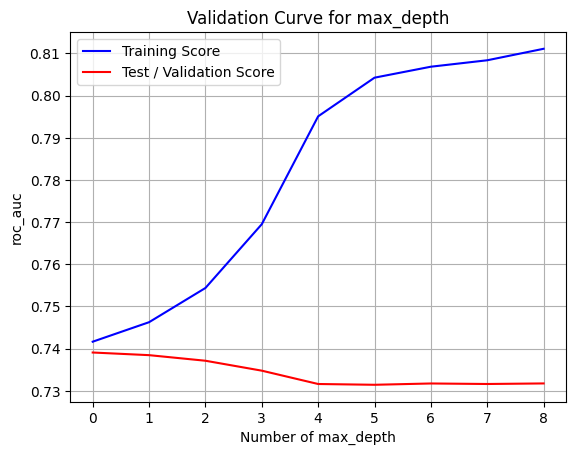

In [265]:
Analyzing model complexity with Learning Curves
from sklearn.model_selection import validation_curve

train_score, test_score = validation_curve(model_tuned,
                                           X, y,
                                           cv=2,
                                           param_name="max_depth",
                                           param_range=range(1, 10),
                                           scoring="roc_auc")

mean_train_score = np.mean(train_score, axis=1)
mean_test_score = np.mean(test_score, axis=1)
print("Train Score Mean-->", mean_train_score)
print("Test Score Mean-->", mean_test_score)

plt.plot(mean_train_score,
         label="Training Score", color="blue")

plt.plot(mean_test_score,
         label="Test / Validation Score", color="red")

plt.title("Validation Curve for max_depth")
plt.xlabel("Number of max_depth")
plt.ylabel("roc_auc")
plt.grid()
plt.legend(loc="best")
plt.show()